In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


<Axes: xlabel='T2', ylabel='T6'>

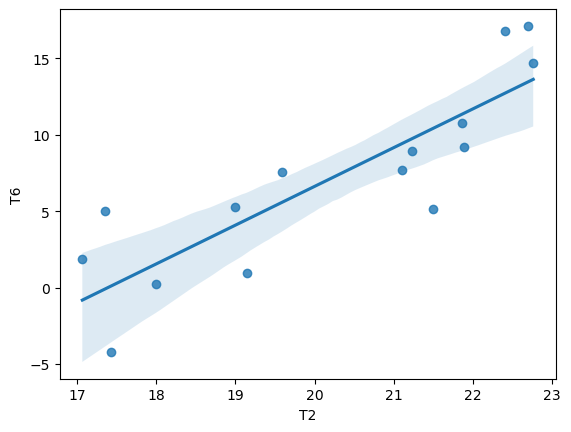

In [2]:
df = pd.read_csv('energydata_complete.csv')

#select a sample of the dataset
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

#regression plot
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

df = pd.read_csv('energydata_complete.csv')

# Extract 'T2' and 'T6' columns
X = df[['T2']]
y = df['T6']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict 'T6' values using 'T2' values in the testing set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", round(rmse, 3))


Root Mean Squared Error: 3.633


In [5]:
# Remove the specified columns
columns_to_remove = ["date", "lights"]
df.drop(columns=columns_to_remove, inplace=True)

# Define features (X) and target variable (y)
X = df.drop(columns=["Appliances"])
y = df["Appliances"]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run multiple linear regression using the training set
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train_scaled)

# Calculate Mean Absolute Error (MAE) for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Mean Absolute Error (training set):", round(mae_train, 3))


Mean Absolute Error (training set): 53.742


In [6]:
# Calculate Root Mean Squared Error (RMSE) for the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Root Mean Squared Error (training set):", round(rmse_train, 3))


Root Mean Squared Error (training set): 95.216


In [7]:
# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Root Mean Squared Error (test set):", round(rmse_test, 3))


Root Mean Squared Error (test set): 93.64


In [8]:
# Train a Ridge regression model with default parameters
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set using the Ridge model
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate RMSE for the test set using the Ridge model
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge regression:", round(rmse_test_ridge, 3))


Ridge regression: 93.709


In [9]:
# Train a Lasso regression model with default parameters
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

# Get feature weights (coefficients) from the Lasso model
feature_weights = lasso_model.coef_

# Count the number of features with non-zero feature weights
num_non_zero_features = sum(feature_weights != 0)

print("Number of features with non-zero feature weights:", num_non_zero_features)


Number of features with non-zero feature weights: 4


In [10]:
# Predict on the test set using the Lasso model
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate RMSE for the test set using the Lasso model
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Root Mean Squared Error (test set) - Lasso regression:", round(rmse_test_lasso, 3))


Root Mean Squared Error (test set) - Lasso regression: 99.424
